Importing dataframes, visualisation and mesa

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import mesa

## The Agent and Model

In [ ]:
class MoneyAgent(mesa.Agent):
	"""An agent with fixed initial wealth"""

	def __init__(self, model):
		super().__init__(model)

		self.wealth = 1

	def exchange(self):
        # Verify agent has some wealth
		if self.wealth > 0:
			other_agent = self.random.choice(self.model.agents)
			if other_agent is not None:
				other_agent.wealth += 1
				self.wealth -= 1

class MoneyModel(mesa.Model):
	"""A model with some number of agents."""

	def __init__(self, n, seed=None):
		super().__init__(seed=seed)
		self.num_agents = n

		#create agents
		MoneyAgent.create_agents(model=self, n=n)

	def step(self):
		self.agents.shuffle_do("exchange")						#randomly shuffle the agents and call their say_hi method

[Text(0.5, 0, 'Wealth'), Text(0, 0.5, 'Number of Agents')]

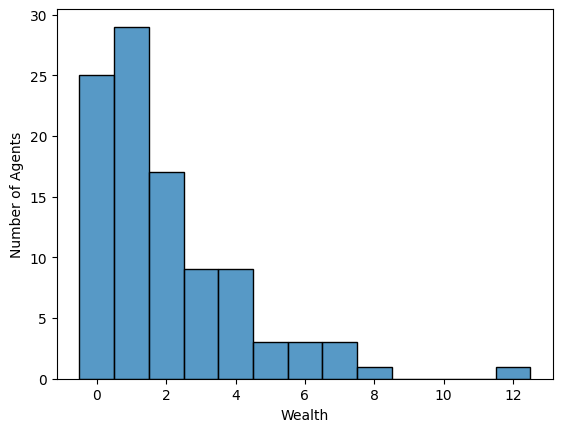

In [66]:
starter = MoneyModel(n=100)
for _ in range(300):	#run the model for 5 steps
	starter.step()
# Collect data
agent_wealth = [agent.wealth for agent in starter.agents]
g = sns.histplot(agent_wealth, discrete=True, kde=False)
g.set(xlabel="Wealth", ylabel="Number of Agents")